In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
# CSVの読み込み
raw = pd.read_csv("data/bybit/2022_1_BTC.csv").dropna()

In [2]:
# 終値のみ切り抜いて新たなデータフレームに格納
data = raw[['close','timestamp']]

In [3]:
# 移動平均線の格納
data['SMA1'] = data['close'].rolling(10).mean()
data['SMA2'] = data['close'].rolling(50).mean()
data = data.dropna()

In [4]:
# シグナルを作る
data['b_sig'] = np.where(data['SMA1'] > data['SMA2'],1,0)
data['s_sig'] = np.where(data['SMA2'] > data['SMA1'],1,0)

In [6]:
# バックテスト用のクラスをインスタンス化
from vector_tester import VectorTester
vector_test = VectorTester(symbol="BTCUSD")

In [7]:
# バックテストを走らす
result = vector_test.run_backtest(df=data)

----------start backtest----------
 ----   finish backtest   ----
 ----   elapsed time: 0.0066509246826171875   ---- 


In [8]:
result

,id,time,lot,side,price
0,0,1641039300,1,BUY,46961.81
1,1,1641040200,-1,SELL,47024.46
2,2,1641041100,-1,SELL,47097.75
3,4,1641042900,1,BUY,47037.00
4,5,1641043800,1,BUY,47074.75
...,...,...,...,...,...
174,2788,1643548500,-1,SELL,37993.64
175,2832,1643588100,1,BUY,37697.37
176,2833,1643589000,-1,SELL,37181.60
177,2873,1643625000,1,BUY,37226.41


In [9]:
pl = vector_test.make_pl(result)

 ----- Make PL Graph -----

            取引回数: 179 
実現損益: -0.2134633435742188 
勝率: 0.2696629213483146 

            平均損益: -0.0011925326456660268 
総利益: 0.37550109232873785 

            総損失: -0.5889644359029176
PF: 0.6375615732265265
最大DD: 0.24921736113917348(0.24919450399358672%)
            
 ----   elapsed time: 0.010270357131958008   ---- 
損益額：-8696.050000000025


<AxesSubplot:>

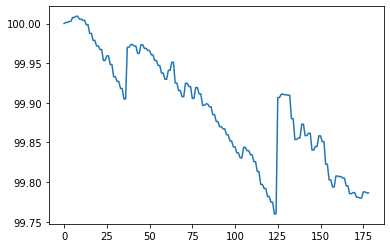

In [10]:
pl.PL_graph.plot()